In [5]:
import sys,os,json
import collections,math
import time,datetime,pytz
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import ListedColormap
import seaborn as sns
import networkx as nx
# from textblob import TextBlob
# from polyglot.detect import Detector
import operator
# import PlotUtil
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')
# import foursq_helper as foursq
# from yelp_helper import *

############################################
########## Plot Style Declaration ##########
# Set the style globally
# Alternatives include bmh, fivethirtyeight, ggplot,
# dark_background, seaborn-deep, etc
# plt.style.use('ggplot')
plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'times new roman'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 15
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

##########################################
########## data set declaration ##########
path_processed = "data/processed/"
path_final = "data/final/"

##### path to external files #####
path_fsq = "../../churn-4sq/data/"
path_yelp = "../../churn-yelp/data/"

##### fsq base datasets #####
fsq_f_venue = 'data/data_final.txt' # 12GB
fsq_f_graph = 'data/foursquare_graph.txt' # 25GB
fsq_f_profile = 'data/profiles_final.tsv' # 7GB
fsq_f_tip = 'data/tips_all.txt' # 31GB

##### Yelp base datasets #####
yelp_f_business = 'data/business.json' # 145.2MB
yelp_f_checkin = 'data/checkin.json'   # 63.3MB
yelp_f_review = 'data/review.json'     # 4.2GB
yelp_f_tip = 'data/tip.json'           # 197.6MB
yelp_f_user = 'data/user.json'         # 1.9GB
yelp_f_photos = 'data/photos.json'     # 26.9MB

##################################
########## End of Setup ##########

##### Geographical Change #####
import geopy
from geopy import distance as geopy_distance
coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)
print (geopy.distance.distance(coords_1, coords_2).km)

279.35290160430094


In [ ]:
[1000]+[]+[10]

In [6]:
with open('data/opportunity.pkl', 'rb') as f:
    opp_data = pickle.load(f)
with open('data/opportunity.classes.pkl', 'rb') as f:
    opp_class = pickle.load(f)

In [11]:
opp_data = np.load('data/opportunity.npy').item()

In [13]:
opp_data

{'test': {'inputs': array([['-962', '-166', '96', ..., '0', '3', '139'],
         ['-961', '-155', '79', ..., '6', '39', '140'],
         ['-981', '-151', '69', ..., '5', '37', '140'],
         ...,
         ['-964', '-37', '247', ..., '-22', '7', '12'],
         ['-971', '-44', '252', ..., '-10', '-6', '12'],
         ['-980', '-52', '256', ..., '-17', '29', '12']], dtype='<U6'),
  'targets': array([1, 1, 1, ..., 1, 1, 1])},
 'training': {'inputs': array([['-983', '-199', '119', ..., '20', '42', '175'],
         ['-986', '-220', '114', ..., '17', '31', '175'],
         ['-987', '-227', '112', ..., '-27', '15', '175'],
         ...,
         ['-984', '-163', '66', ..., '24', '-36', '-77'],
         ['-981', '-133', '75', ..., '25', '16', '-77'],
         ['-994', '-113', '82', ..., '32', '2', '-77']], dtype='<U6'),
  'targets': array([1, 1, 1, ..., 1, 1, 1])},
 'validation': {'inputs': array([['-980', '-204', '26', ..., '4', '-7', '105'],
         ['-978', '-204', '28', ..., '19', '16'

In [19]:
opp_data['training']['inputs'].shape

(700165, 77)

In [20]:
opp_data['validation']['inputs'].shape

(31892, 77)

In [18]:
opp_data['test']['inputs'].shape

(120516, 77)

### Initial look of Opportunity dataset

### Plot Traces for single subject

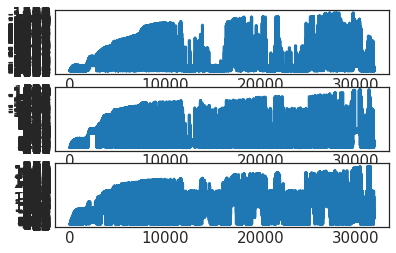

In [21]:
# plot the x, y, z acceleration and activities for a single subject
def plot_subject(subject):
    plt.figure()
    # create a plot for each column
    for col in range(3):
        plt.subplot(3, 1, col+1)
        plt.plot(subject[:,col])
    plt.show()

# load
# subjects = load_dataset()
# print('Loaded %d subjects' % len(subjects))
# plot activities for a single subject
plot_subject(opp_data['validation']['inputs'])

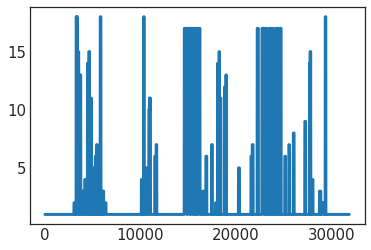

In [22]:
plt.figure()
plt.plot(opp_data['validation']['targets'])
plt.show()

In [30]:
opp_val = np.concatenate((opp_data['validation']['inputs'], opp_data['validation']['targets'].T), axis=1)

ValueError: all the input arrays must have same number of dimensions

In [44]:
opp_val = np.c_[opp_data['validation']['inputs'], opp_data['validation']['targets']

TypeError: only size-1 arrays can be converted to Python scalars

In [35]:
opp_val.shape

(31892, 78)

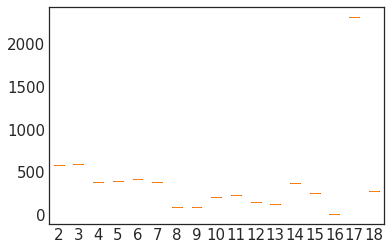

In [49]:
# returns a list of dict, where each dict has one sequence per activity
def group_by_activity(s, activities):
    grouped = [{a:s[s[:,-1]==str(a)] for a in activities}]
    return grouped

# calculate total duration in sec for each activity per subject and plot
def plot_durations(grouped, activities):
    # calculate the lengths for each activity for each subject
    freq = 1
    durations = [[len(s[a])/freq for s in grouped] for a in activities]
    plt.boxplot(durations, labels=activities)
    plt.show()

# load
# subjects = load_dataset()
# print('Loaded %d subjects' % len(subjects))
# group traces by activity for each subject

activities = [i for i in range(2,19)]
grouped = group_by_activity(opp_val, activities)
# plot durations
plot_durations(grouped, activities)

In [45]:

opp_val[opp_val[:,-1]==str(1)]

array([['-980', '-204', '26', ..., '-7', '105', '1'],
       ['-978', '-204', '28', ..., '16', '105', '1'],
       ['-977', '-204', '29', ..., '37', '105', '1'],
       ...,
       ['-976', '-219', '37', ..., '-16', '168', '1'],
       ['-976', '-221', '41', ..., '-19', '168', '1'],
       ['-979', '-218', '35', ..., '-14', '168', '1']], dtype='<U21')

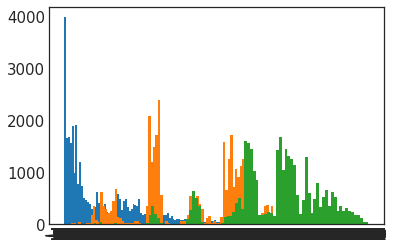

In [50]:
plt.figure()
plt.hist(opp_val[:,0], bins=100)
plt.hist(opp_val[:,1], bins=100)
plt.hist(opp_val[:,2], bins=100)
plt.show()

In [52]:
df = pd.DataFrame(opp_val)

In [55]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,31892,31892,31892,31892,31892,31892,31892,31892,31892,31892,...,31892,31892,31892,31892,31892,31892,31892,31892,31892,31892
unique,1641,1362,1458,3848,2298,1857,2094,1853,1838,1660,...,3242,2782,6256,4750,5533,4750,6256,5533,449,17
top,-973,-231,55,-6,4,4,520,-847,653,-984,...,369,-807,-4,9,-6,9,4,-6,-4,1
freq,399,176,132,133,182,281,144,133,148,183,...,454,469,292,291,393,291,292,393,3080,25056
